# Statistical Thinking in Python

---
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
---

## Part 2

---
### Chapter 1: Parameter estimation by optimization

* Linear regression
* Importance of EDA - Anscombe quartet

In [4]:
# === Imports === #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# === Load data === #
nohitters = pd.read_csv("assets/data/mlb_nohitters.csv")
print(nohitters.shape)
nohitters.head()

(294, 5)


,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [7]:
nohitters["date"] = pd.to_datetime(nohitters["date"])

In [8]:
nohitters.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,1970-01-01 00:00:00.018760715,140,NaN,NaN,NaN
1,1970-01-01 00:00:00.018800612,1035,NaN,NaN,NaN
2,1970-01-01 00:00:00.018800617,1046,NaN,NaN,NaN
3,1970-01-01 00:00:00.018800819,1177,NaN,NaN,NaN
4,1970-01-01 00:00:00.018800820,1179,NaN,NaN,NaN


In [ ]:
# === Get times between nohitters === #
# ... transformations and such here

In [ ]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype="step")
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

In [ ]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

In [7]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [2]:
# === Load and set up data === #
datapath = "assets/data/female_literacy_fertility.csv"
df = pd.read_csv(datapath)
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [5]:
illiteracy = 100 - df["female literacy"]
fertility = df["fertility"]

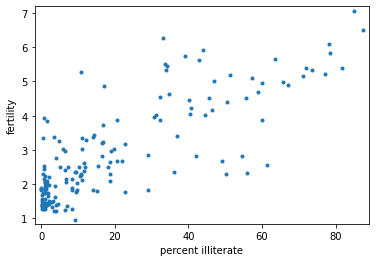

0.8041324026815344


In [8]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


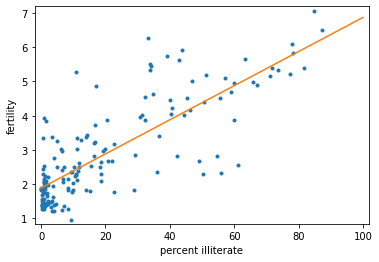

In [9]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


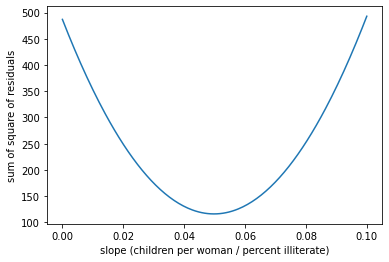

In [10]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

In [18]:
# === Load and set up new data === #
anscombe = pd.read_csv("assets/data/anscombe.csv", skiprows=1)
x = anscombe["x"]
y = anscombe["y"]
anscombe.head()

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


0.5000909090909095 3.000090909090909


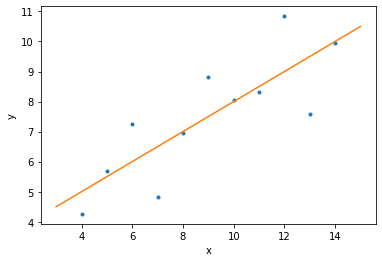

In [19]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [21]:
anscombe_x = [
    anscombe["x"],
    anscombe["x.1"],
    anscombe["x.2"],
    anscombe["x.3"],
]
anscombe_y = [
    anscombe["y"],
    anscombe["y.1"],
    anscombe["y.2"],
    anscombe["y.3"],
]

In [22]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735


---

### Chapter 2: Bootstrap confidence intervals

* Generating bootstrap replicates
  * Using resampled data to perform statistical inference
* Bootstrap confidence intervals
* Pairs bootstrap
  * Nonparametric inference
    * Make no assumptions about the model or probability distribution underlying the data

Load and set up dataset

In [24]:
!head assets/data/sheffield_weather_station.csv

# Cleaned up from http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/sheffielddata.txt
# More info: https://data.gov.uk/dataset/historic-monthly-meteorological-station-data
# Sheffield
# Location 433900E 387200N, Lat 53.381 Lon -1.490, 131 metres amsl
# Missing data (more than 2 days missing in month) is marked by  ---.
# (af is air frost)
#    yyyy  mm   tmax    tmin      af    rain     sun
#               degC    degC    days      mm   hours
   yyyy  mm   tmax    tmin      af    rain     sun
   1883   1    6.3     1.7       6   122.1     ---


In [32]:
# === Load and set up dataset === #
sheffield = pd.read_csv("assets/data/sheffield_weather_station.csv", skiprows=8, delimiter="\t")
sheffield.head()

,yyyy mm tmax tmin af rain sun
0,1883 1 6.3 1.7 6 122.1 ...
1,1883 2 8.0 2.8 2 69.8 ...
2,1883 3 4.8 -1.6 23 29.6 ...
3,1883 4 12.2 3.8 2 74.0 ...
4,1883 5 14.7 6.2 0 31.2 ...


In [40]:
# === Didn't get read in correctly === #
with open("assets/data/sheffield_weather_station.csv") as f:
    shef_lines = f.readlines()

shef_lines = [l.strip() for l in shef_lines[8:]]
shef_lines[:10]

['yyyy  mm   tmax    tmin      af    rain     sun',
 '1883   1    6.3     1.7       6   122.1     ---',
 '1883   2    8.0     2.8       2    69.8     ---',
 '1883   3    4.8    -1.6      23    29.6     ---',
 '1883   4   12.2     3.8       2    74.0     ---',
 '1883   5   14.7     6.2       0    31.2     ---',
 '1883   6   17.7     9.3       0    66.2     ---',
 '1883   7   18.8    10.5       0    77.6     ---',
 '1883   8   19.8    10.9       0    32.5     ---',
 '1883   9   16.8    10.0       0   137.4     ---']

In [42]:
shef_cols = shef_lines[0].split()
shef_cols

['yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', 'sun']

In [45]:
shef_data = [l.split() for l in shef_lines[1:]]
shef_data[:5]

[['1883', '1', '6.3', '1.7', '6', '122.1', '---'],
 ['1883', '2', '8.0', '2.8', '2', '69.8', '---'],
 ['1883', '3', '4.8', '-1.6', '23', '29.6', '---'],
 ['1883', '4', '12.2', '3.8', '2', '74.0', '---'],
 ['1883', '5', '14.7', '6.2', '0', '31.2', '---']]

In [58]:
shef_df = pd.DataFrame(data=shef_data, columns=shef_cols)
shef_df = shef_df.replace(to_replace="---", value=np.NaN)
for col in shef_df.columns:
    shef_df[col] = pd.to_numeric(shef_df[col])
shef_df.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6.0,122.1,NaN
1,1883,2,8.0,2.8,2.0,69.8,NaN
2,1883,3,4.8,-1.6,23.0,29.6,NaN
3,1883,4,12.2,3.8,2.0,74.0,NaN
4,1883,5,14.7,6.2,0.0,31.2,NaN


In [59]:
shef_df.dtypes

yyyy      int64
mm        int64
tmax    float64
tmin    float64
af      float64
rain    float64
sun     float64
dtype: object

In [66]:
# === Get annual rainfall === #
rainfall = shef_df.groupby("yyyy")["rain"].sum()

In [62]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

Generating bootstrap replicats and visualizing bootstrap samples

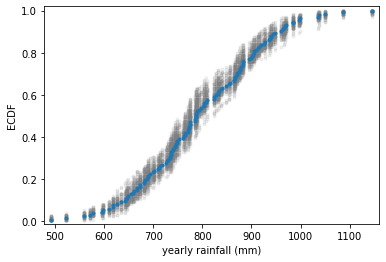

In [67]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.', linestyle="none")

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Bootstrap confidence intervals

In [68]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [69]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

10.635458130769608
10.593436358257149


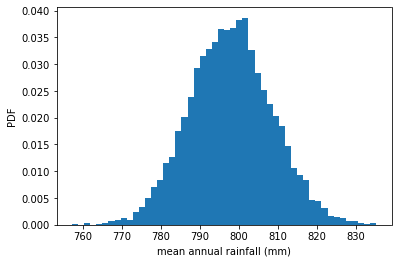

In [70]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [71]:
# === 95% confidence interval === #
np.percentile(bs_replicates, [2.5, 97.5])

array([777.49876866, 819.01046642])

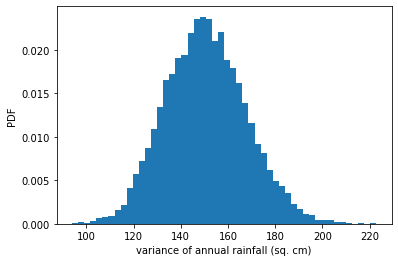

In [72]:
# === Bootstrap replicates of other statistics === #
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Confidence interval on rate of no-hitters

First, load and set up the dataset...

In [73]:
# === No-hitters dataset === #
nohitters = pd.read_csv("assets/data/mlb_nohitters.csv")
nohitters.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [80]:
# === Get difference in game_number between no hitter games === #
nohitter_times = nohitters["game_number"].diff().dropna()
nohitter_times[:5]

1    895.0
2     11.0
3    131.0
4      2.0
5    935.0
Name: game_number, dtype: float64

95% confidence interval = [629.86629693 817.24368601] games


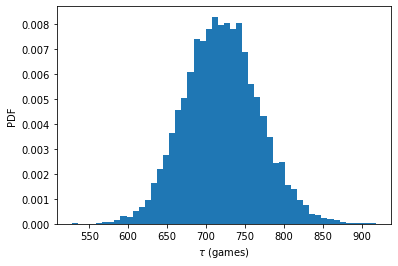

In [82]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [83]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.04458946 0.05548586]


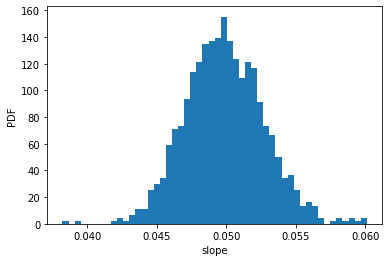

In [85]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

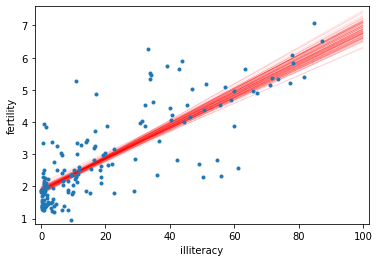

In [86]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x,
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker=".", linestyle="none")
# _ = plt.scatter(illiteracy, fertility)

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

---

### Chapter 3: Introduction to Hypothesis Testing

* Formulating and simulating a hypothesis
  * Permutation / generating permutation samples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [1]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [4]:
def load_sheffield(path):
    # Load data line by line
    with open(path) as f:
        shef_lines = f.readlines()
    # Strip lines
    shef_lines = [l.strip() for l in shef_lines[8:]]
    # Split header row
    shef_cols = shef_lines[0].split()
    # Split data rows
    shef_data = [l.split() for l in shef_lines[1:]]
    # Load into dataframe and fix datatypes
    shef_df = pd.DataFrame(data=shef_data, columns=shef_cols)
    shef_df = shef_df.replace(to_replace="---", value=np.NaN)
    for col in shef_df.columns:
        shef_df[col] = pd.to_numeric(shef_df[col])
    return shef_df

In [6]:
# === Load weather dataset === #
weather = load_sheffield("assets/data/sheffield_weather_station.csv")
print(weather.shape)
weather.head()

(1602, 7)


,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6.0,122.1,NaN
1,1883,2,8.0,2.8,2.0,69.8,NaN
2,1883,3,4.8,-1.6,23.0,29.6,NaN
3,1883,4,12.2,3.8,2.0,74.0,NaN
4,1883,5,14.7,6.2,0.0,31.2,NaN


In [25]:
# === Get June and November rainfall === #
rain_june = weather[weather["mm"] == 6]["rain"]
rain_november = weather[weather["mm"] == 11]["rain"]

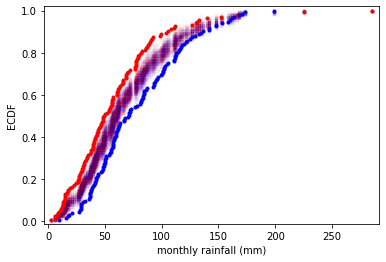

In [28]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

#### Test statistics and p-values

* p-value: the probability that a value of the test statistic is at least as extreme as what was observed, given the null hypothesis is true
  * _Not_ the probability that the null hypothesis is true
* NHST: Null Hypothesis Significance Testing
* Best to not simply state that the p-value is statistically significant or not
  * Consider the value of the p-value
  * Consider how much different the data are from what's expected from the null hypothesis (practical significance)
* When performing hypothesis tests, your choice of test statistic should be:
  * Relevant to the question which the hypothesis test is trying to answer
* The p-value is generally a measure of:
  * the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true

In [3]:
# === Imports === #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [2]:
# === Generating permutation replicates === #
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [43]:
with open("assets/data/frog_tongue.csv", "r") as f:
    lines = f.read()
print(lines)

# These data are from the paper,
#   Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
# It was featured in the New York Times.
#    http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html
#
# The authors included the data in their supplemental information.
#
# Importantly, the ID refers to the identifites of the frogs they tested.
#   I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   II:  adult, 70 mm SVL and 72.7 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
#   IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (m

In [33]:
# === Load data for next exercise: frog_tongue.csv === #
def load_frog_data(filepath):
    """Loads frog tongue dataset into DataFrame."""
    # Open file and read into list
    with open(filepath, "r") as f:
        lines = f.readlines()
    # Extract column names
    cols = lines[14].strip().split(",")
    # Load into dataframe from list of lists
    data = [l.strip().split(",") for l in lines[15:]]
    df = pd.DataFrame(data, columns=cols)
    # Fix date column
    df["date"] = pd.to_datetime(df["date"].str.replace("_", "-"))
    # Fix other columns
    for col in df.columns[2:]:
        df[col] = pd.to_numeric(df[col])
    return df

dfrogs = load_frog_data("assets/data/frog_tongue.csv")
print(dfrogs.shape)
dfrogs.head()

(80, 15)


,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013-02-26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013-02-26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013-03-01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013-03-01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013-03-01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [34]:
dfrogs.dtypes

date                                                    datetime64[ns]
ID                                                              object
trial number                                                     int64
impact force (mN)                                                int64
impact time (ms)                                                 int64
impact force / body weight                                     float64
adhesive force (mN)                                              int64
time frog pulls on target (ms)                                   int64
adhesive force / body weight                                   float64
adhesive impulse (N-s)                                         float64
total contact area (mm2)                                         int64
contact area without mucus (mm2)                                 int64
contact area with mucus / contact area without mucus           float64
contact pressure (Pa)                                            int64
adhesi

In [35]:
dfrogs["ID"].value_counts()

I      20
IV     20
III    20
II     20
Name: ID, dtype: int64

In [50]:
# === Match up with data in exercise === #
df = dfrogs[["ID", "impact force (mN)"]]
df = df.rename(mapper={"impact force (mN)": "impact_force"}, axis=1)
# A (adult) is ID == II | B (juvenile) is ID == IV
df = df[(df["ID"] == "II") | (df["ID"] == "IV")]

print(df.shape)
df.head()

(40, 2)


,ID,impact_force
20,II,1612
21,II,605
22,II,327
23,II,946
24,II,541


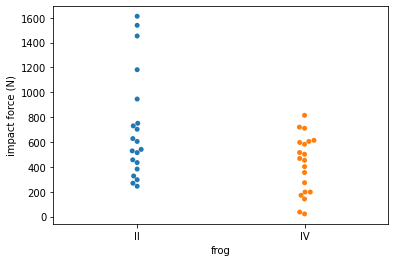

In [51]:
# === Look before you leap: EDA before hypothesis testing === #
# Make bee swarm plot
_ = sns.swarmplot(x="ID", y="impact_force", data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [ ]:
# === Match up data sets to exercise === #
force_a = df[df["ID"] == "II"]
force_b = df[df["ID"] == "IV"]

In [ ]:
# === Permutation test on frog data === #

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = data_1.mean() - data_2.mean()

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)